<a href="https://colab.research.google.com/github/Klearpixeloff/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project-3**

# Supervised-Classification

# **Project - Mobile Price Range Prediction**

# **Participants Name**

**ABHISHEK JAIN**

**KHUSHBOO CHAURASIYA**

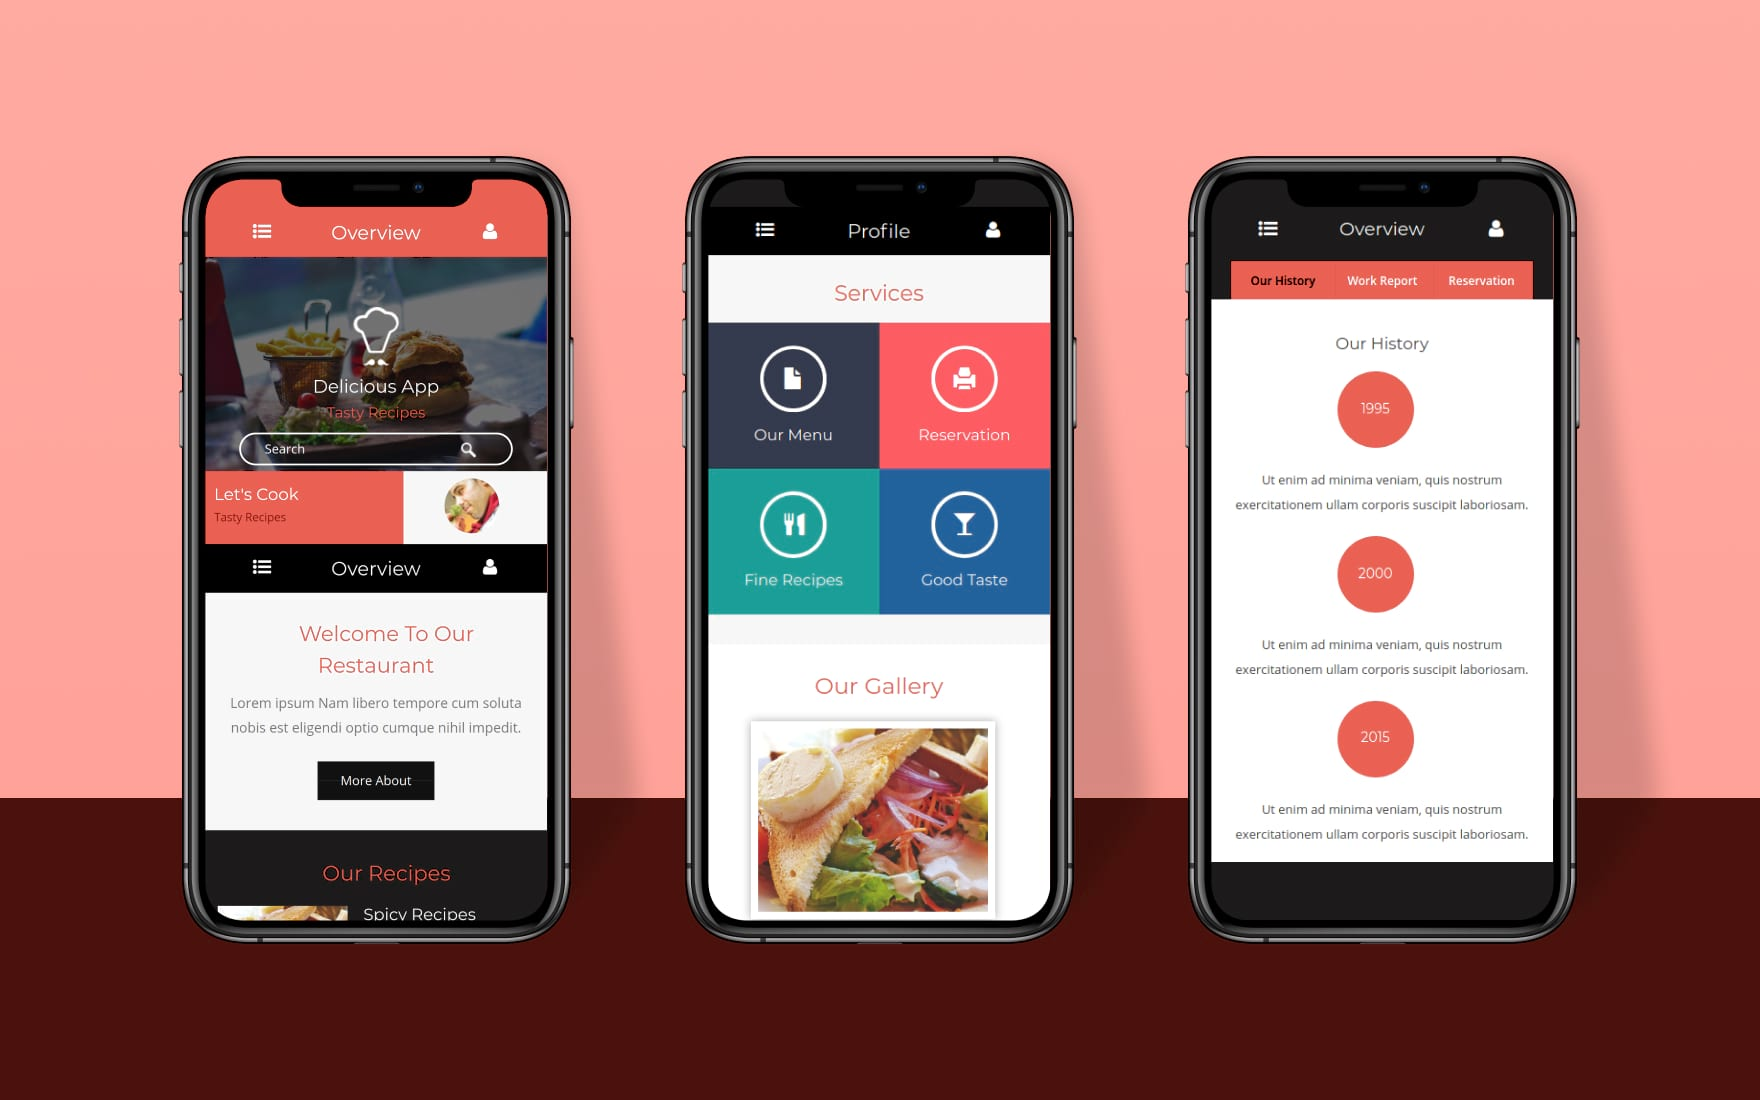

# **Github Link:-**

**ABHISHEK JAIN**  [https://github.com/Klearpixeloff/Mobile-Price-Range-Prediction](https://github.com/Klearpixeloff/Mobile-Price-Range-Prediction)

**KHUSHBOO CHAURASIYA** [https://github.com/Geniuskhushboo/Mobile-Range-Price-Prediction](https://github.com/Geniuskhushboo/Mobile-Range-Price-Prediction)




# Business Context

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some reltaion between features of a mobile phone(eg:- RAM,internal Memory,etc) and its selling price.In this problem,we do not have to predict the actual price but a price range indicating how high the price is.

# Importing Libraries

In [91]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
#Basic Operations 
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
from sklearn import tree # data visualisation for tree

#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import learning_curve

#Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


import warnings
warnings.filterwarnings('ignore')


# Data Understanding

**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last over a call

**Three_g -** Has 3G or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost)

# Dataset Loading and Cleanup

In [93]:
#loading the data
df = pd.read_csv('drive/MyDrive/data_mobile_price_range.csv')

In [94]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [95]:
df.shape

(2000, 21)

In [96]:
df.size

42000

In [97]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [99]:
#Transpose the describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# EDA(Exploratory Data Analysis)

**1.** **Battery - price range**

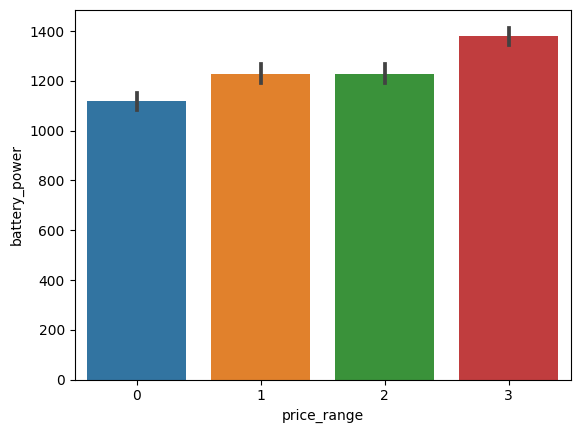

In [100]:

sns.barplot(data=df,y='battery_power',x='price_range')
plt.show()

mid range and high mid range phones is offer good battery performance

**2.** **Ram - Price Range**

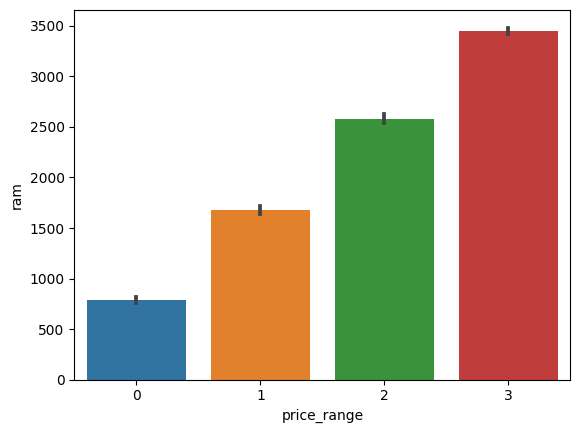

In [101]:
sns.barplot(data=df,y='ram',x='price_range')
plt.show()

mostly only very high price range smartphones provide good ram

**3.** **Memory - Price Range**

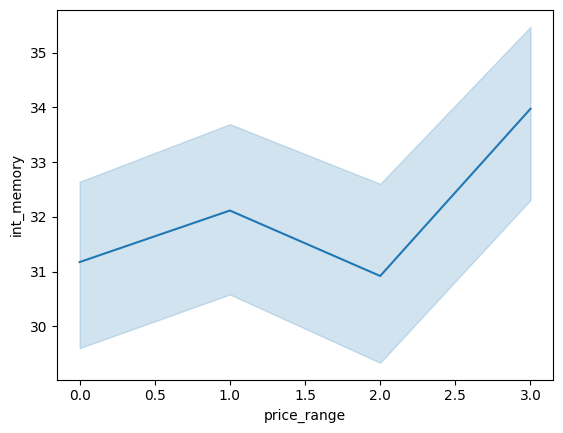

In [102]:
sns.lineplot(data=df,x='price_range',y='int_memory')
plt.show()

mid range and very high range offer good memory but i\very high range offer high memory

**4. Front mega pixel - price range**

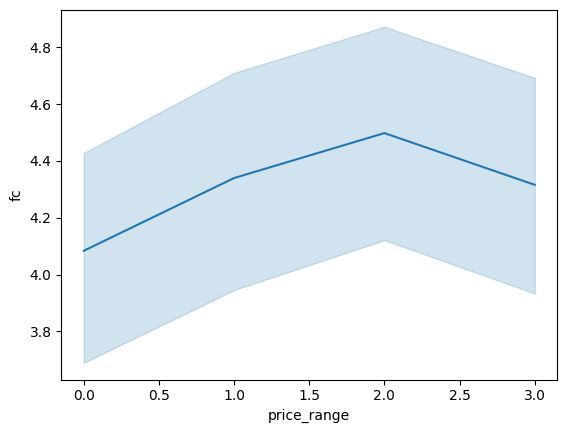

In [103]:
sns.lineplot(data=df,x='price_range',y='fc')
plt.show()

expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offer good front camera

**5.** **How many 3g phones** **and 4g phones**

<Axes: xlabel='three_g', ylabel='count'>

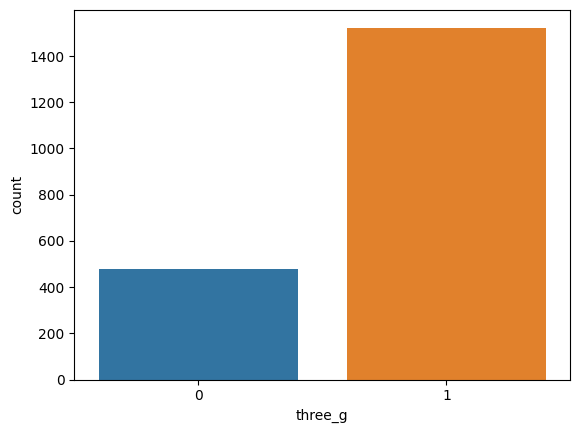

In [104]:
sns.countplot(data=df,x='three_g')

In [105]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

<Axes: xlabel='four_g', ylabel='count'>

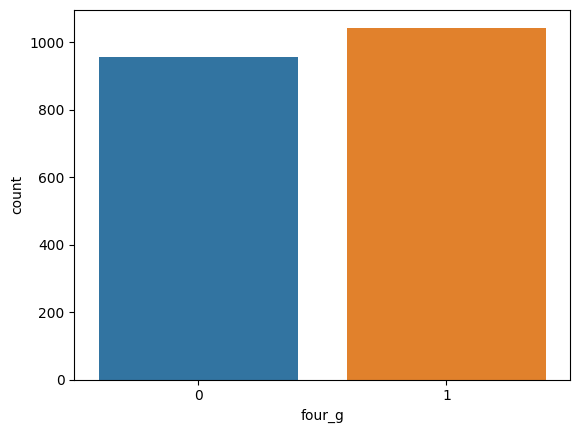

In [106]:
sns.countplot(data=df,x='four_g')

In [107]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

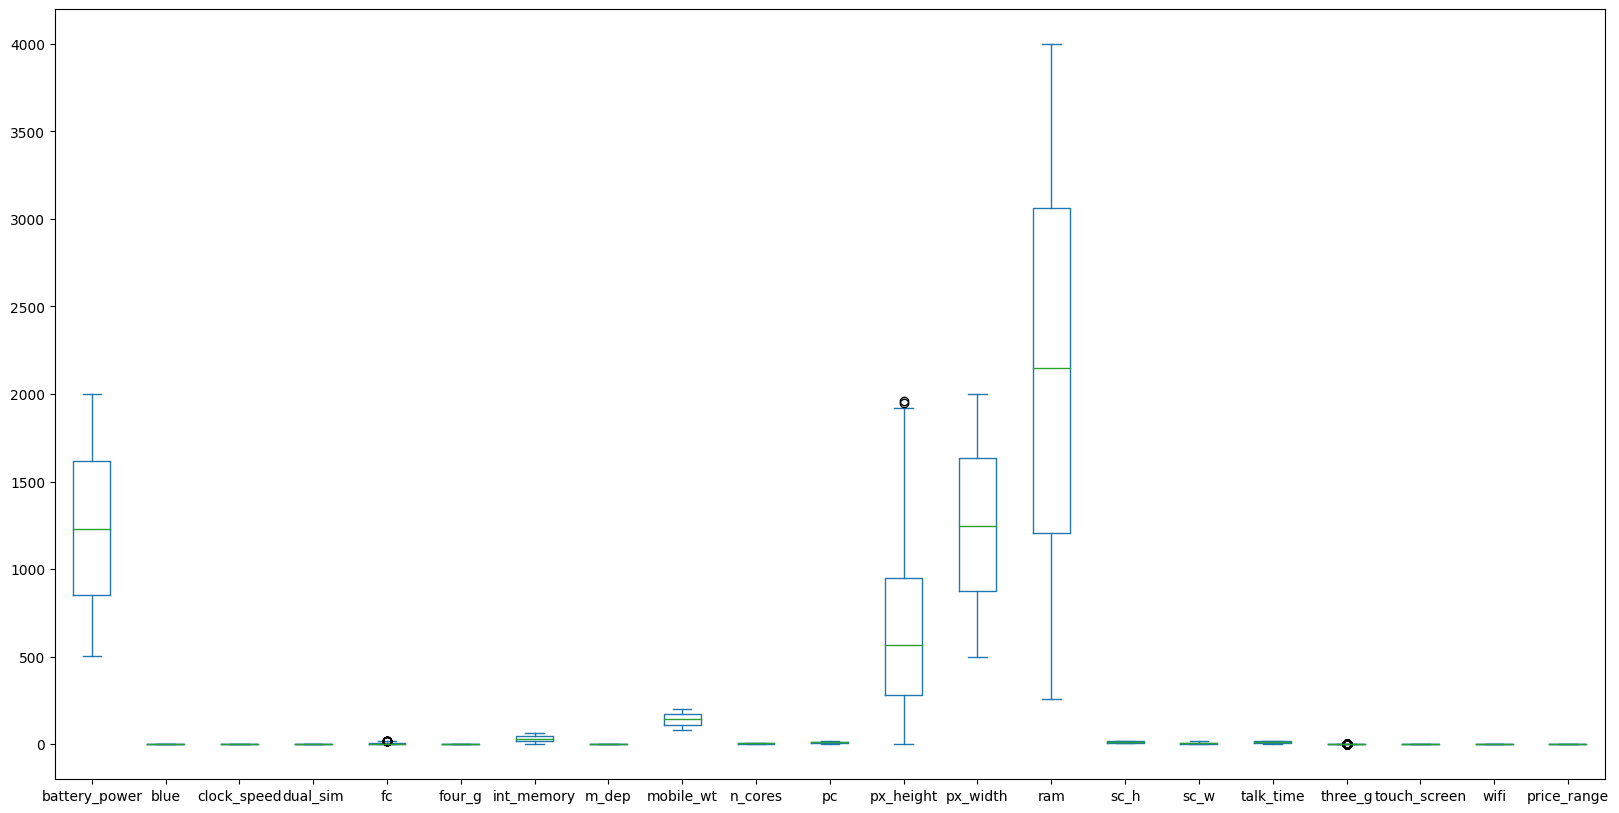

In [108]:
#checking outliers

df.plot(kind='box',figsize=(20,10))
plt.show()

in this data we can see that there is very low outilers in the data.

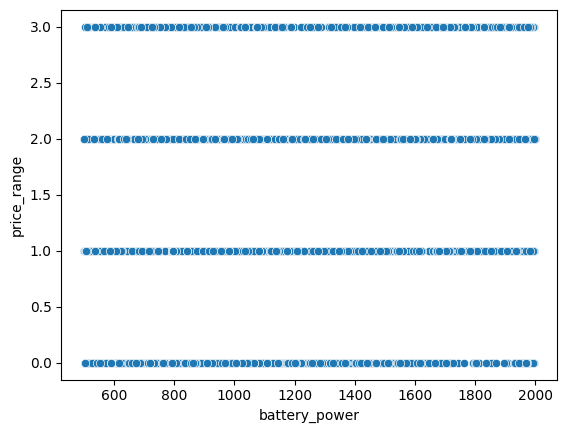

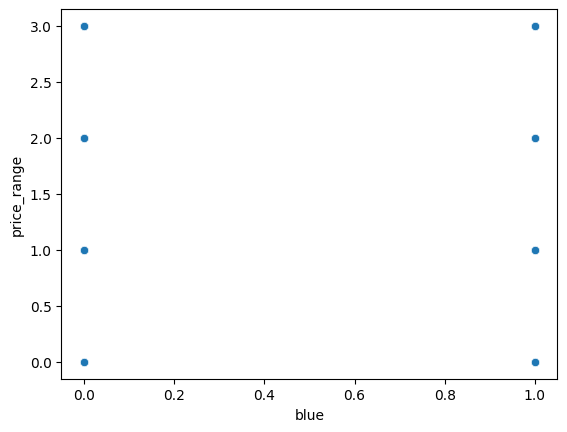

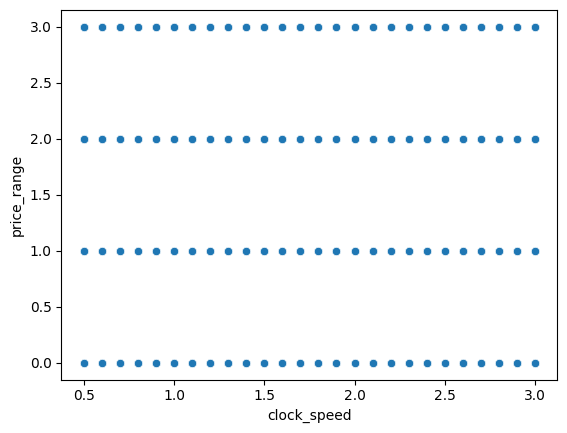

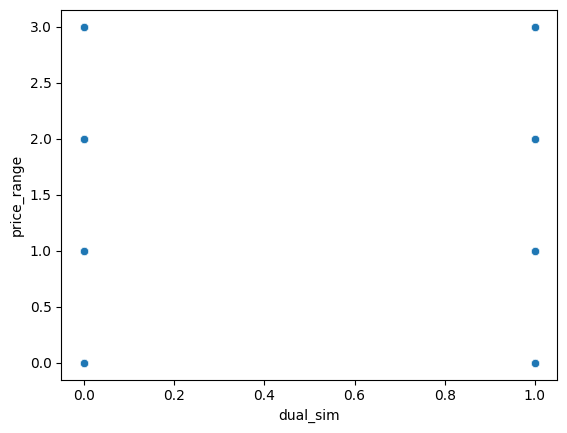

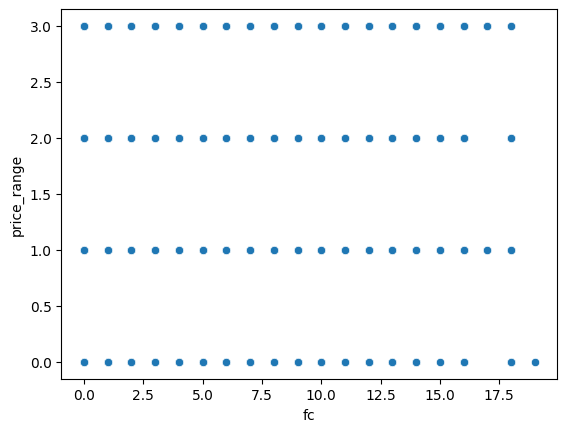

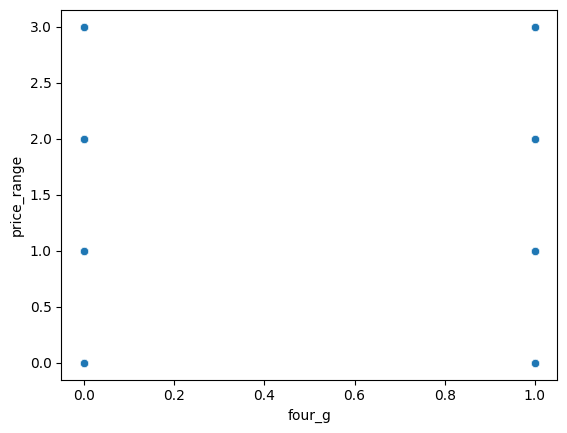

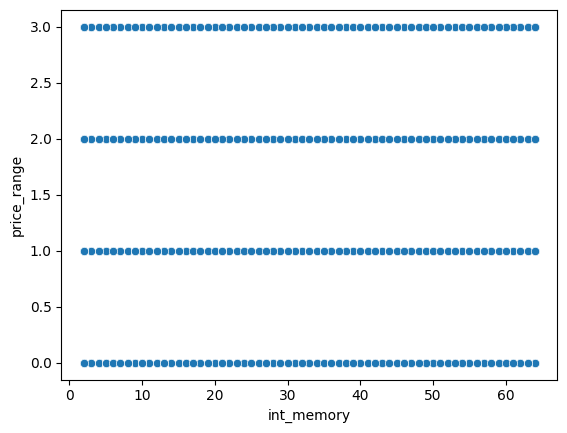

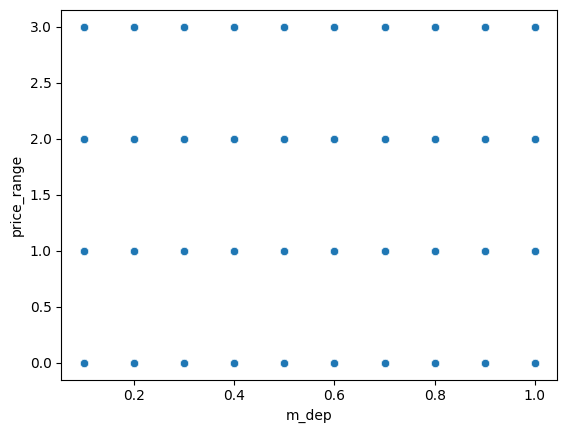

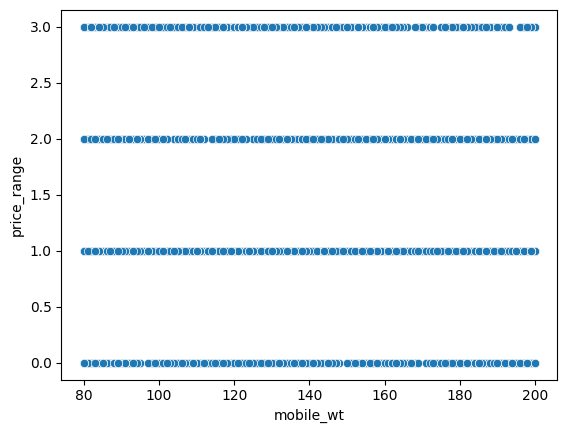

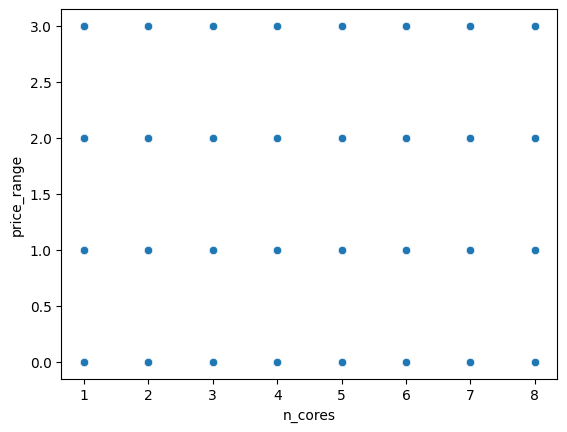

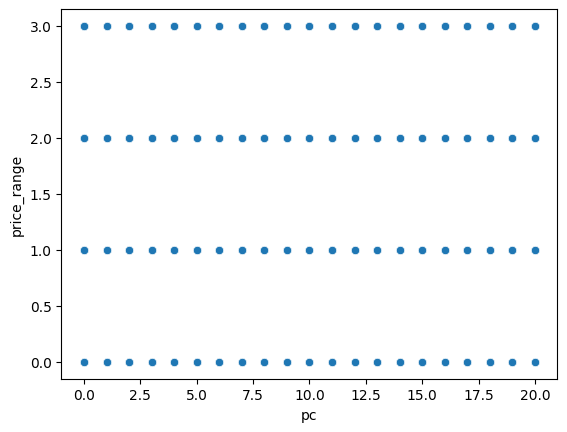

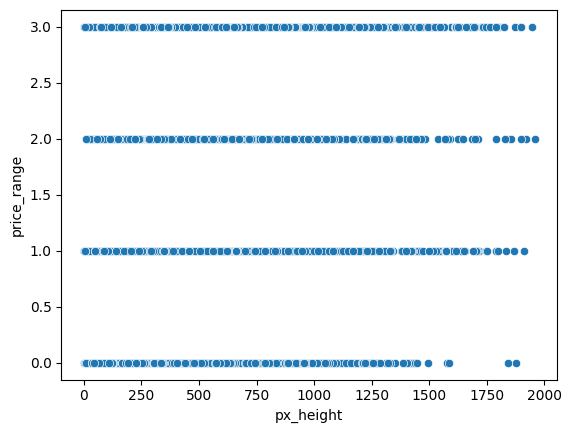

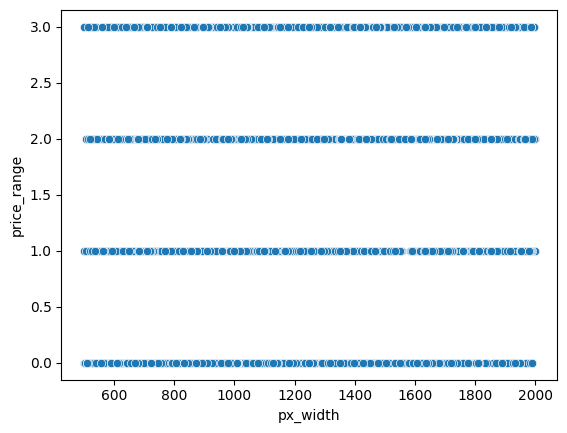

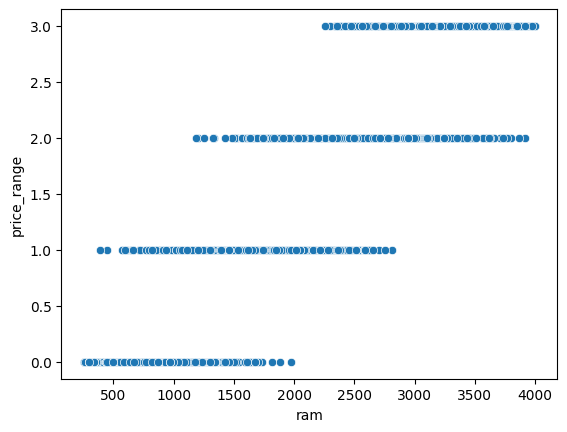

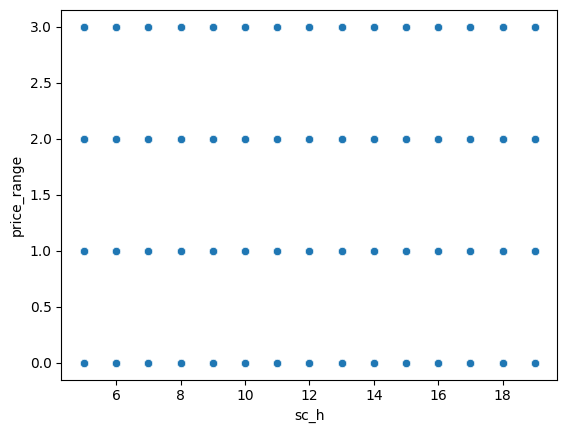

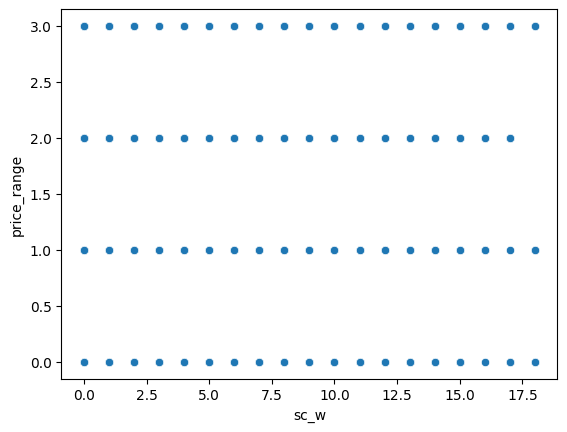

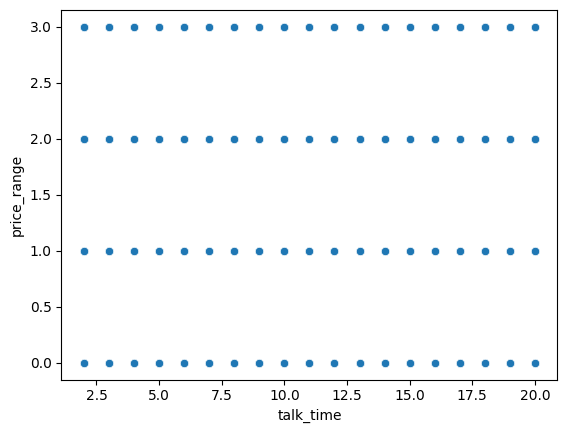

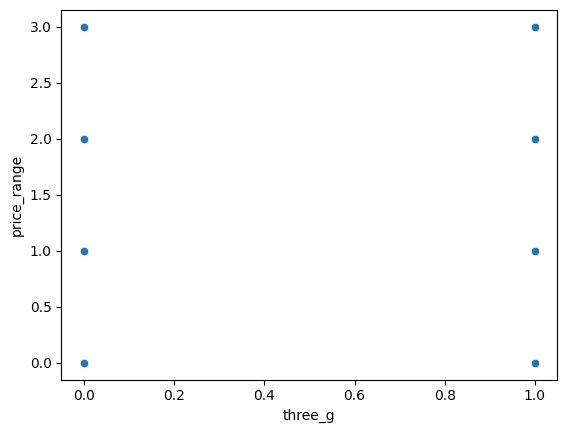

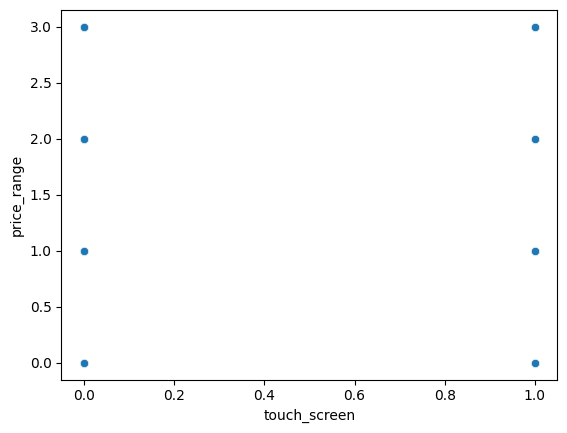

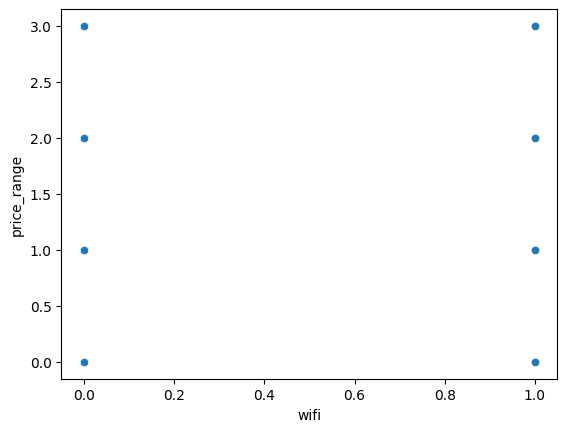

In [109]:
 for i in df.describe().columns[:-1]:
   sns.scatterplot(df,x=i,y=df.describe().columns[-1])
   plt.show()

# Feature Engineering

**check multicollinearity**

<function matplotlib.pyplot.show(close=None, block=None)>

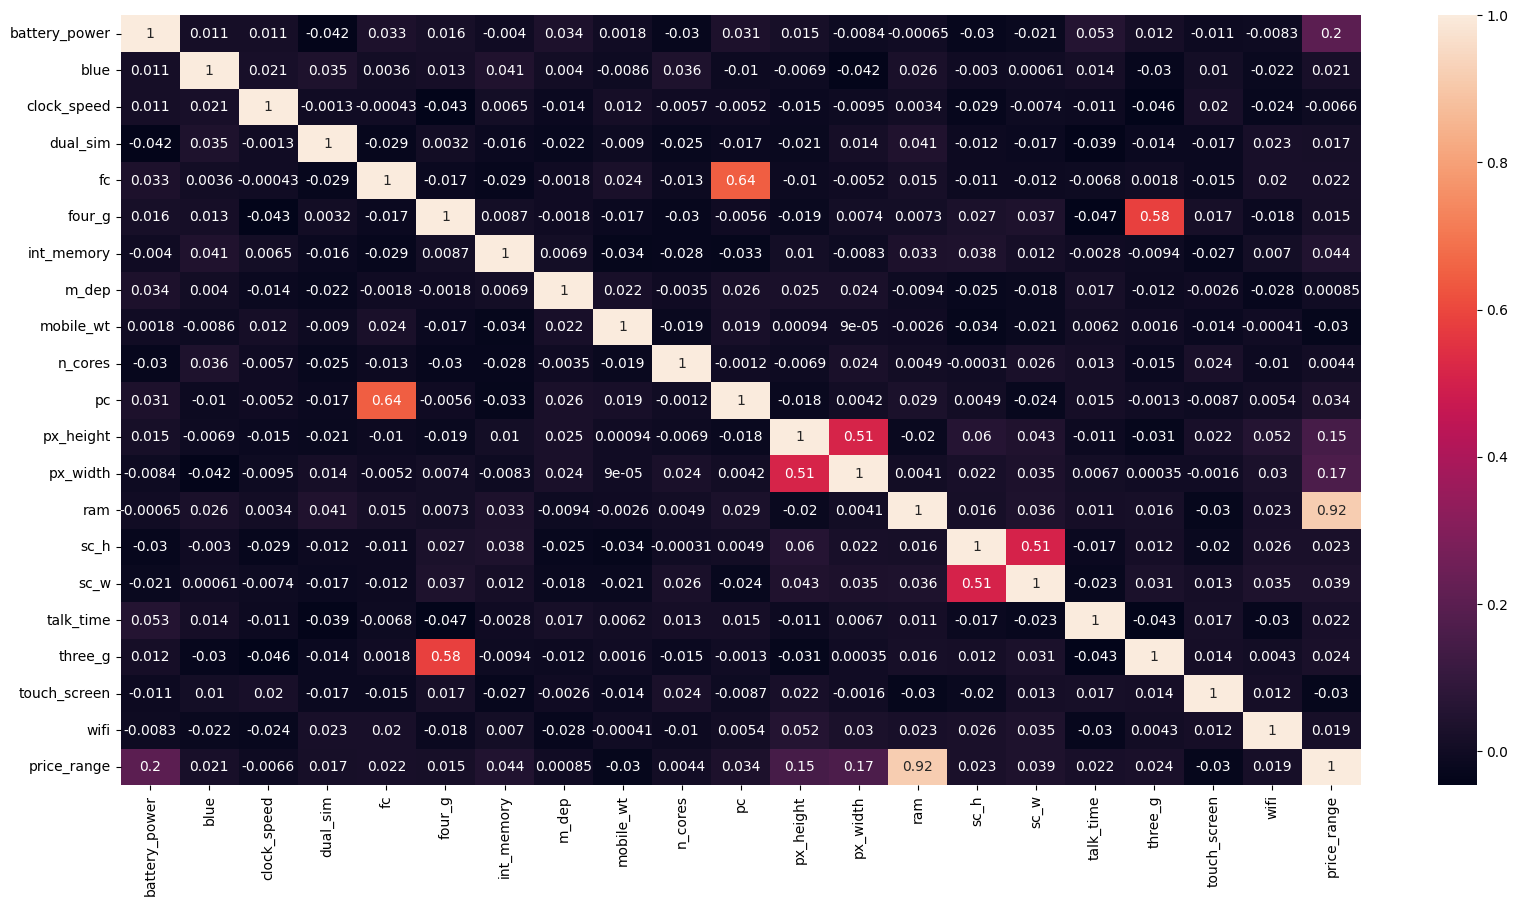

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

after analysing heat map,there no independent variable are highly correlated except ram

In [111]:
dependent_variable ='price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [112]:
x=df[independent_varaible].values
y=df[dependent_variable].values

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

**Feature scalling**

In [114]:
stand = StandardScaler()

In [115]:
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

#Model Implementation

# **check overfiiting**

In [116]:
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')
  
  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()
 

# **MODEL-1 DECISION TREE** 

[Text(0.48130053908355797, 0.9583333333333334, 'x[17] <= 0.106\ngini = 0.75\nsamples = 1500\nvalue = [375, 375, 375, 375]'),
 Text(0.1714538409703504, 0.875, 'x[17] <= -0.989\ngini = 0.584\nsamples = 778\nvalue = [375, 324, 79, 0]'),
 Text(0.07075471698113207, 0.7916666666666666, 'x[6] <= 1.793\ngini = 0.176\nsamples = 318\nvalue = [287, 31, 0, 0]'),
 Text(0.03908355795148248, 0.7083333333333334, 'x[7] <= 0.838\ngini = 0.101\nsamples = 299\nvalue = [283, 16, 0, 0]'),
 Text(0.01078167115902965, 0.625, 'x[11] <= 1.559\ngini = 0.018\nsamples = 225\nvalue = [223, 2, 0, 0]'),
 Text(0.005390835579514825, 0.5416666666666666, 'gini = 0.0\nsamples = 214\nvalue = [214, 0, 0, 0]'),
 Text(0.016172506738544475, 0.5416666666666666, 'x[6] <= 0.918\ngini = 0.298\nsamples = 11\nvalue = [9, 2, 0, 0]'),
 Text(0.01078167115902965, 0.4583333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.0215633423180593, 0.4583333333333333, 'x[8] <= 0.964\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 

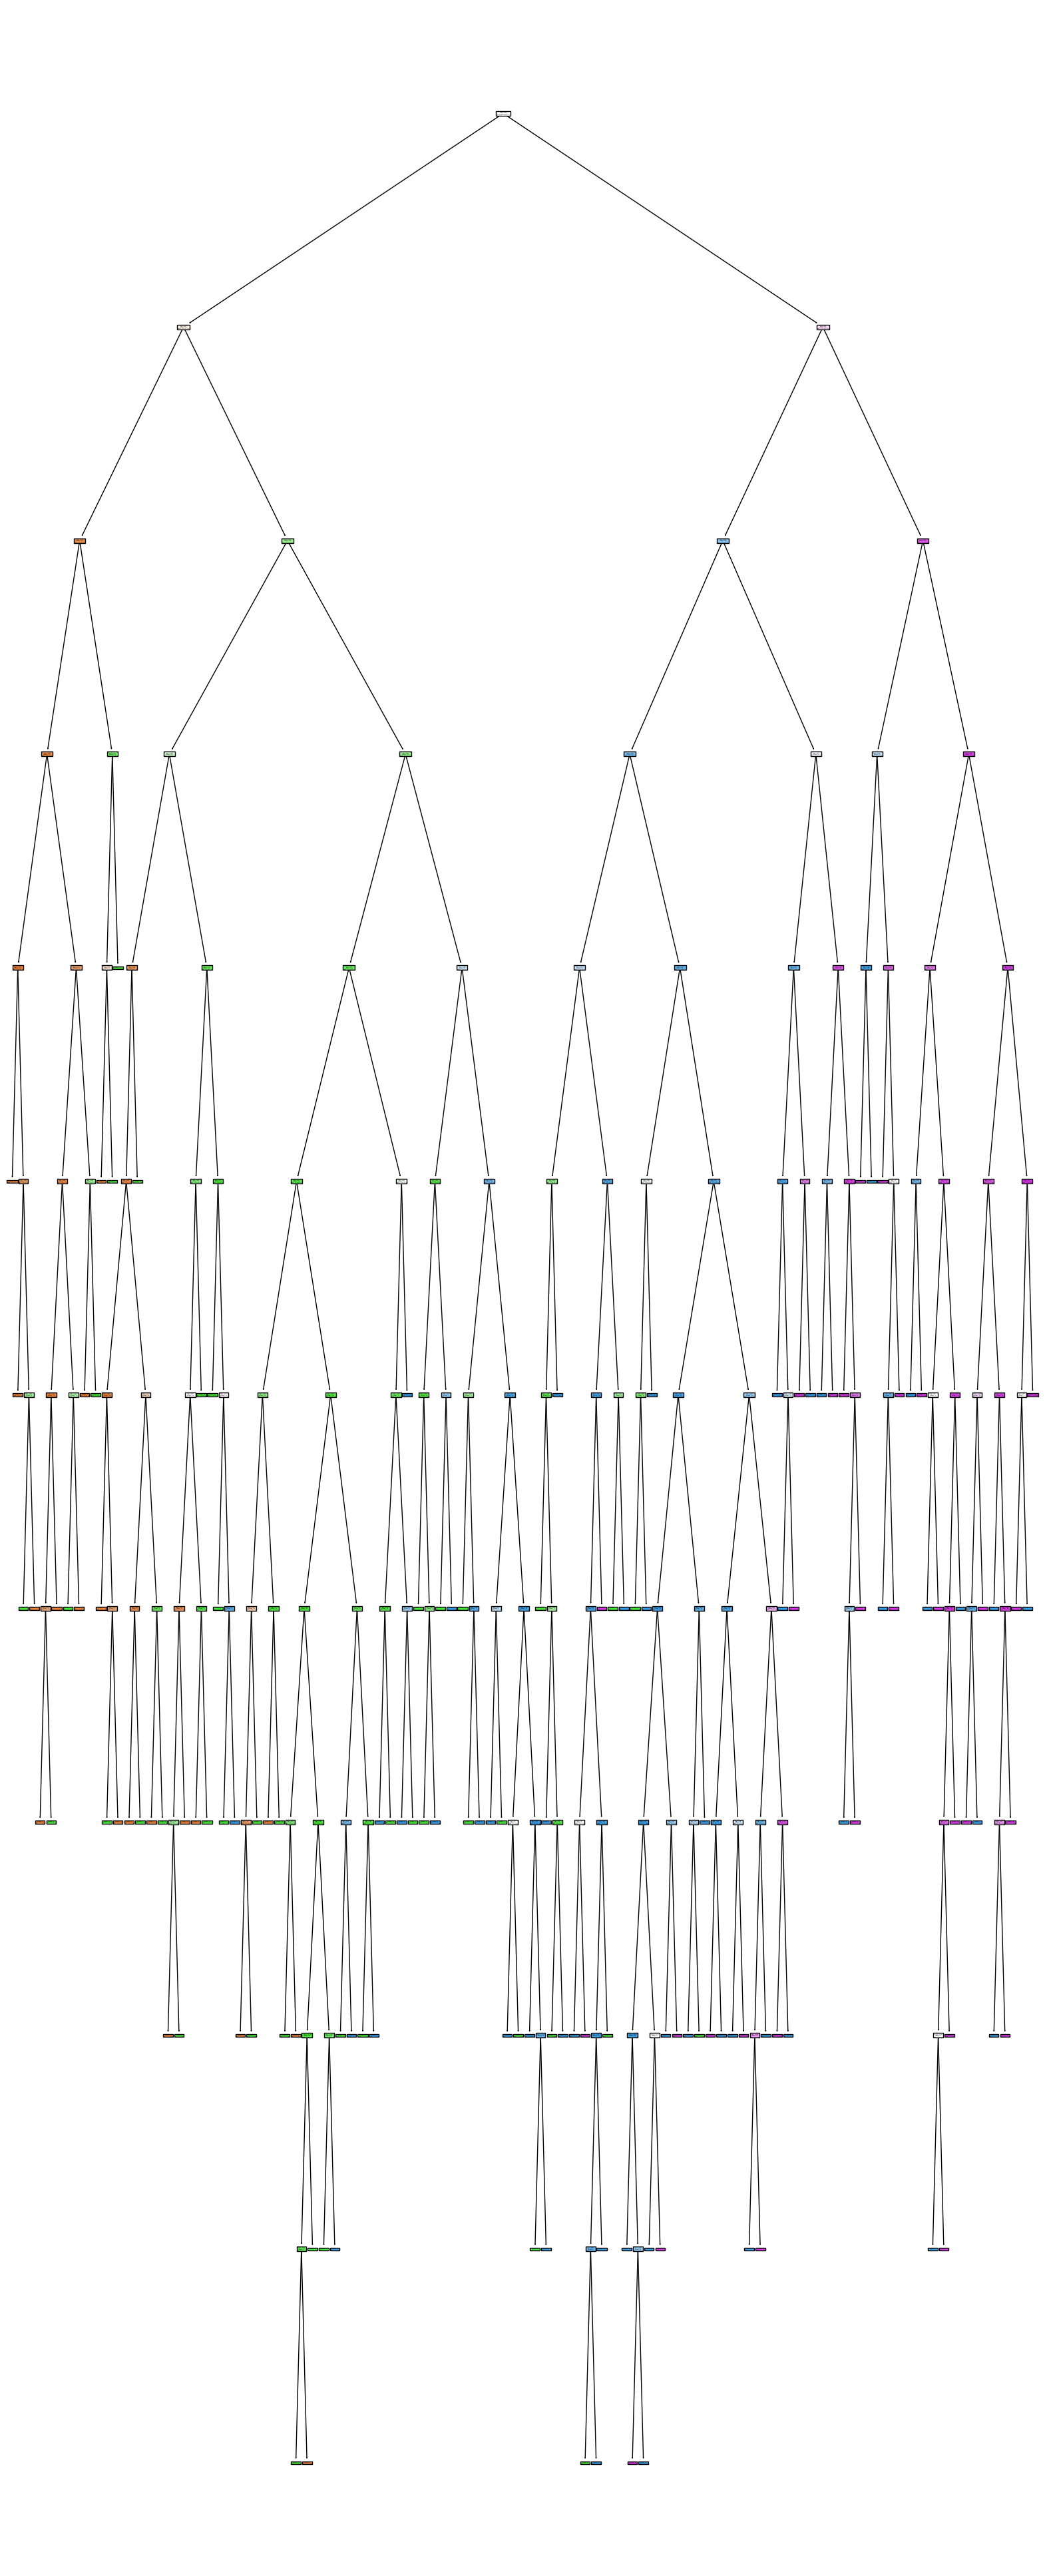

In [117]:
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)
plt.figure(figsize=(20,50))
tree.plot_tree(dec,filled=True)

In [118]:
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.802


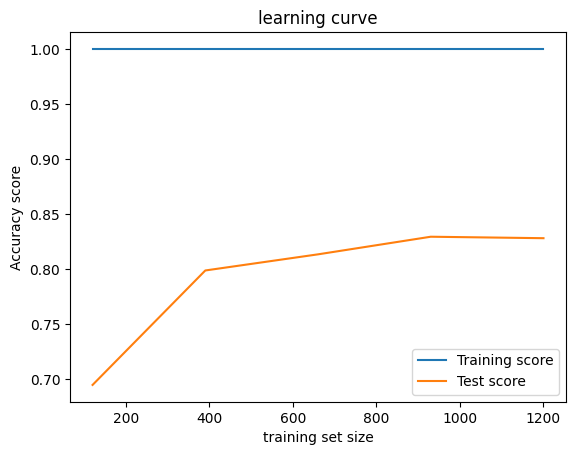

In [119]:
check_overfit(dec)

# DECISION TREE(PRE PRUNNING)

In [120]:
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}

In [121]:
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.808

In [122]:
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [123]:
dec =DecisionTreeClassifier(criterion='entropy',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       min_impurity_decrease=0)

In [124]:
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.826


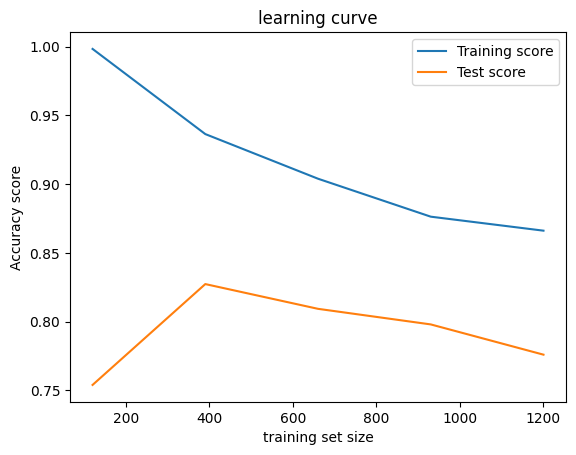

In [125]:
check_overfit(dec)

# **Model-2 RANDOM FOREST**

In [126]:
rf_tune = RandomForestClassifier(max_depth= 15,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf_tune.fit(x_train,y_train)
rf_tune_pred = rf_tune.predict(x_test)
rf_tune_accuracy = accuracy_score(rf_tune_pred,y_test)
rf_tune_accuracy

0.888

# **MODEL -3 (K NEAREST NEIGHBORS)**

In [127]:
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

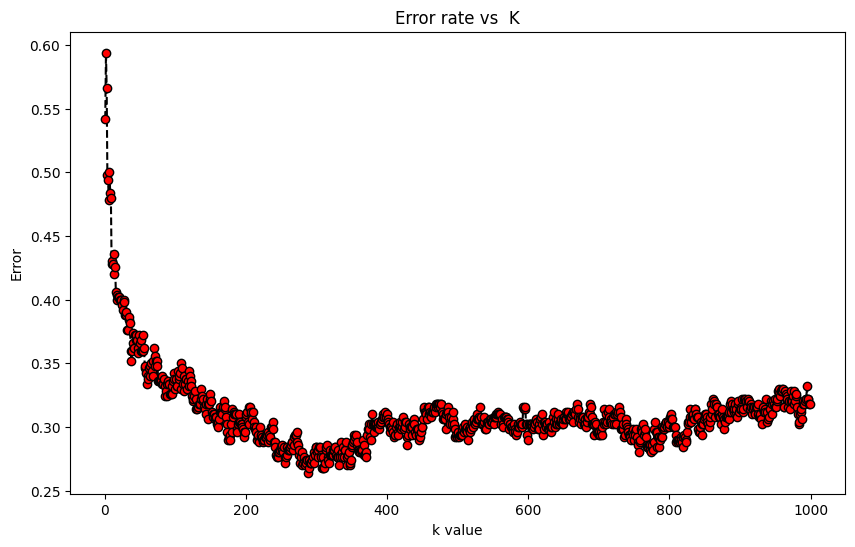

minimum error  0.264 at the value of k = 288


In [128]:
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [129]:

accuracy=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  accuracy.append(accuracy_score(knn_pred,y_test))


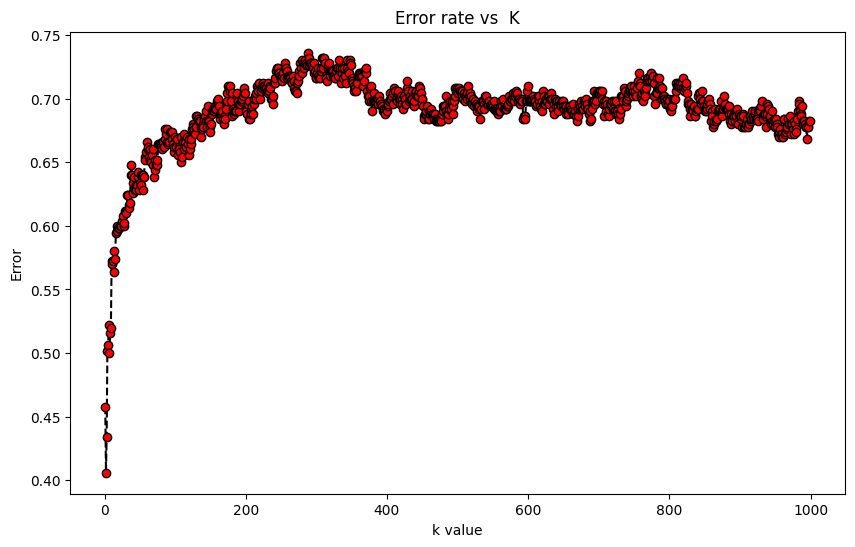

maximum accuracy  0.736 at the value of k = 288


In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),accuracy,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("maximum accuracy ",max(accuracy),"at the value of k =",accuracy.index(max(accuracy))+1)

In [131]:
knn = KNeighborsClassifier(n_neighbors=288,p=1,weights='distance',metric= 'manhattan')

In [132]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=288, p=1,
                     weights='distance')

In [133]:
knn_pred = knn.predict(x_test)

In [134]:
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.764

# **MODEL-4 LOGISTIC REGRESSION**

In [135]:
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'C':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]}

In [136]:
logi = LogisticRegression()
logi = GridSearchCV(logi,param_grid=parameter,scoring='accuracy',cv=5)

In [137]:
logi.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [138]:
logi.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [139]:
logi_tune = LogisticRegression(C= 1, penalty= 'l1', solver= 'saga')

In [140]:
logi_tune.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [141]:
logi_tune_pred = logi_tune.predict(x_test)
logi_tune_accuracy = accuracy_score(logi_tune_pred,y_test)
logi_tune_accuracy

0.962

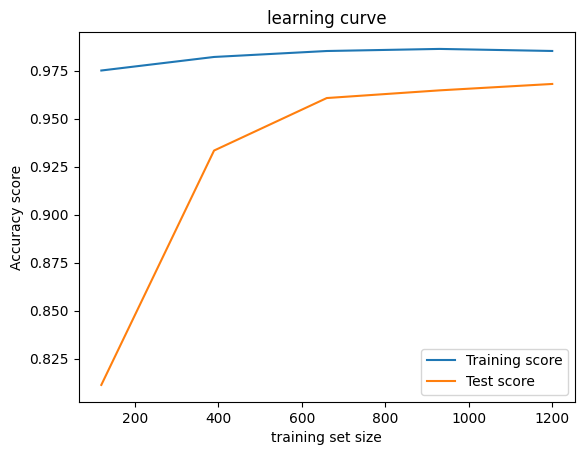

In [142]:
check_overfit(logi_tune)

# **Model-5** **Naive Bayes**

In [143]:
nb=GaussianNB()

In [144]:
nb.fit(x_train,y_train)

GaussianNB()

In [145]:
nb_pred = nb.predict(x_test)

In [146]:
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.818

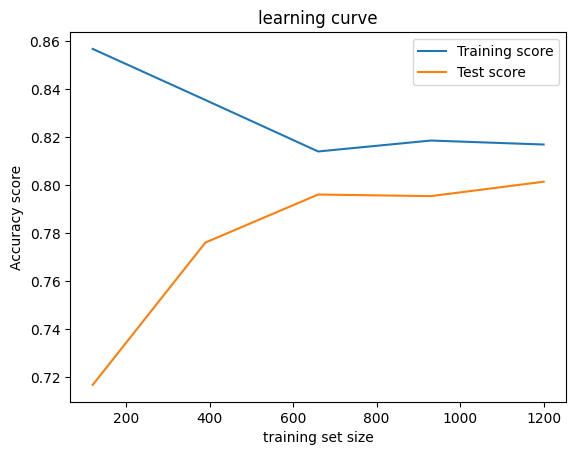

In [147]:
check_overfit(nb)

# **Model-6** **XgBoost**

In [148]:
xgb= XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [149]:
xgb_pred = xgb.predict(x_test)

In [150]:
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)

#Evaluation

In [151]:
Data = {'knn accuracy':knn_accuracy,'DecisionTree accuracy' : dec_pred_accuracy,'LogisticRegression' : logi_tune_accuracy , 'RandomForest' : rf_tune_accuracy,'Naive Bays':nb_accuracy,'xgboost':xg_boost_accuracy}

In [152]:
evaluation = pd.DataFrame(data={'Model':['KNN classifier','DecisionTree classifier','LogisticRegression classifier','RandomForest classifier','Naive Bays','xgboost'], 'accuracy':[knn_accuracy,dec_pred_accuracy,logi_tune_accuracy,rf_tune_accuracy,nb_accuracy,xg_boost_accuracy]})


In [153]:
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [154]:
evaluation

,Model,accuracy
0,LogisticRegression classifier,0.962
1,xgboost,0.912
2,RandomForest classifier,0.888
3,DecisionTree classifier,0.826
4,Naive Bays,0.818
5,KNN classifier,0.764


In [166]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

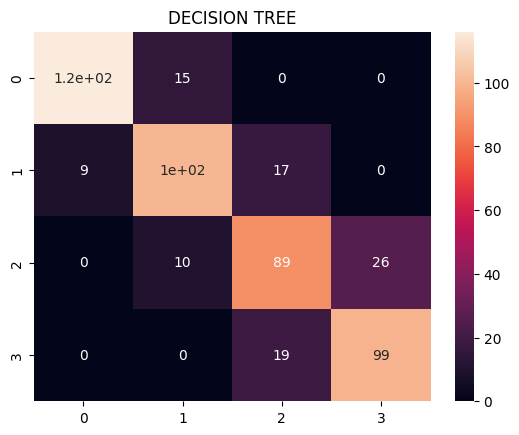

In [167]:
conf(pre_dec_pred,'DECISION TREE')


In [168]:
classi(pre_dec_pred,'DECISION TREE')

DECISION TREE
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       131
           1       0.80      0.79      0.80       126
           2       0.71      0.71      0.71       125
           3       0.79      0.84      0.81       118

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



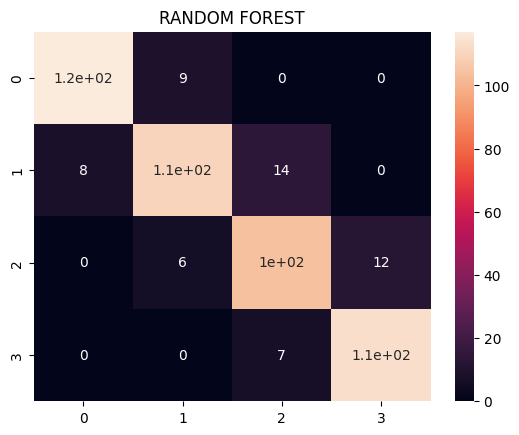

In [163]:
conf(rf_tune_pred,'RANDOM FOREST')

In [169]:
classi(rf_tune_pred,'RANDOM FOREST')

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       126
           1       0.88      0.83      0.86       132
           2       0.83      0.85      0.84       122
           3       0.90      0.94      0.92       120

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



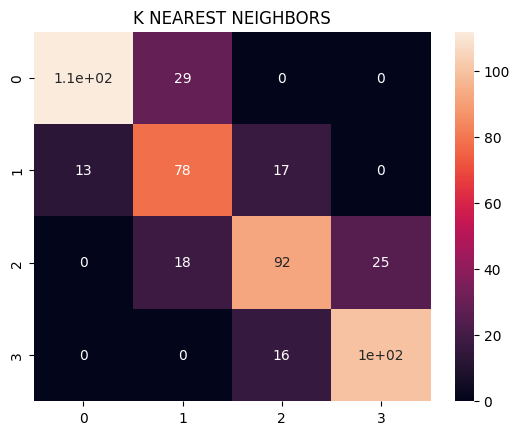

In [177]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [178]:
classi(knn_pred,'K NEAREST NEIGHBORS')

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       141
           1       0.62      0.72      0.67       108
           2       0.74      0.68      0.71       135
           3       0.80      0.86      0.83       116

    accuracy                           0.76       500
   macro avg       0.76      0.77      0.76       500
weighted avg       0.77      0.76      0.77       500



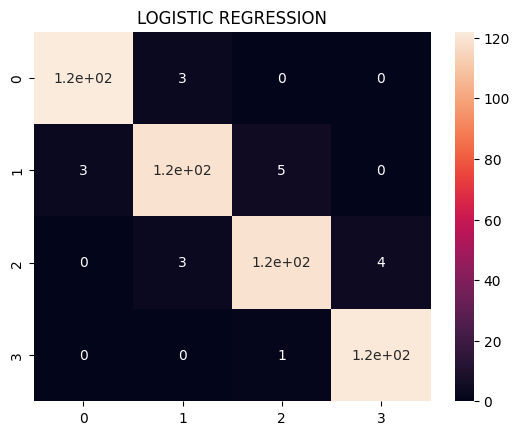

In [172]:
conf(logi_tune_pred,'LOGISTIC REGRESSION')

In [173]:
classi(logi_tune_pred,'LOGISTIC REGRESSION')

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.95      0.94      0.94       127
           2       0.95      0.94      0.95       126
           3       0.97      0.99      0.98       122

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



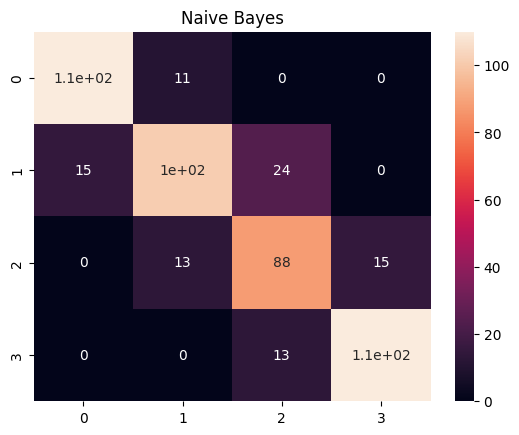

In [174]:
conf(nb_pred,'Naive Bayes')

In [175]:
classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       121
           1       0.81      0.72      0.76       140
           2       0.70      0.76      0.73       116
           3       0.88      0.89      0.89       123

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



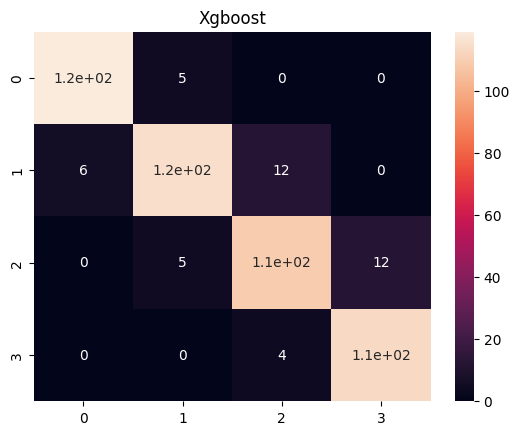

In [179]:
conf(xgb_pred,'Xgboost')

In [180]:
classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.92      0.86      0.89       133
           2       0.87      0.87      0.87       126
           3       0.90      0.97      0.93       117

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



# Model Explainability

In [155]:
features = independent_varaible
importances = xgb.feature_importances_
indices = np.argsort(importances)

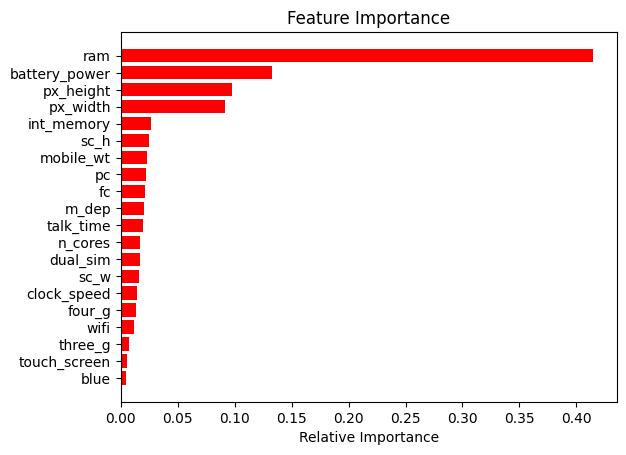

In [156]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()
     

# Conclusion

1. From EDA we can see that mid range and high mid range phones is offer good battery performance and expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offer good front camera

2. There are some top features like Ram,battery_power,px_width,px_height,
  mobile_wt.

3. form all the above experiments we can conclude that logistic regression and xgboost gave the best results